<a href="https://colab.research.google.com/github/schumacher-jan/masterthesis/blob/main/NB01_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis
This notebook was created as a result of the **exploratory data analysis** (chapter 2.1.2). The layout and structure of the notebook should correspond to that of the chapter, allowing for parallel study of the chapter in the paper and the notebook.

At the beginning, the following files will be read in:
* 20min_scores.tsv
* NZZ_scores.tsv
* Watson_scores.tsv
* requirements.txt

The first three files contain the scraped data from the Griesser et al. (2023) project. The requirements.txt file includes the necessary dependencies for the code setup.<br><br>

In this notebook, a basic data quality check is performed, examining data types, identifying missing values and detecting duplicates in selected columns. Text analysis is then performed, calculating word counts and visualising word count distributions for each dataset. This is followed by sentiment analysis, which uses box plots to illustrate sentiment scores and produces a summary table of statistical measures. Emotional intensity is explored in a similar way. The notebook concludes with a classification of polarisation based on sentiment and emotional intensity, providing insight into the distribution of polarisation classes for each dataset. Visualisations further enhance the understanding of these classifications.<br><br>

The implementation of the Exploratory Data Analysis resulted in the following three CSV files:

* nzz_classified.csv
* 20min_classified.csv
* watson_classified.csv

These files contain the polarization labels and serve as the data basis for the subsequent process.

In [ ]:
from google.colab import files

# Upload the necessary files
uploaded = files.upload()

Saving 20min_scores.tsv to 20min_scores.tsv
Saving NZZ_scores.tsv to NZZ_scores.tsv
Saving requirements.txt to requirements.txt
Saving Watson_scores.tsv to Watson_scores.tsv


In [ ]:
# Install the required dependencies
!pip install -r requirements.txt --quiet

In [ ]:
# Import statements
from prettytable import PrettyTable
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
file_20min = "20min_scores.tsv"
watson_file = "Watson_scores.tsv"
nzz_file = "NZZ_scores.tsv"

# Read each TSV file into a dataframe
df_20min = pd.read_csv(file_20min, sep='\t')
df_watson = pd.read_csv(watson_file, sep='\t')
df_nzz = pd.read_csv(nzz_file, sep='\t')

# Assigne a name attribute to the dataframes
df_20min.name = "20 Minuten"
df_watson.name = "Watson"
df_nzz.name = "NZZ"

## General
The first part of the data exploration and inspection focuses on obtaining fundamental characteristics of the data foundation. This part aims to gain a general understanding of the three datasets, which serve as the basis for subsequent, more specific investigations.

### Examine the dimensions of the datasets

In [ ]:
# Display dimensions and data types of the dataframes
print(f"The 20 Minuten dataset has {df_20min.shape[0]} rows and {df_20min.shape[1]} columns.\n"
      f"The Watson dataset has {df_watson.shape[0]} rows and {df_watson.shape[1]} columns.\n"
      f"The NZZ dataset has {df_nzz.shape[0]} rows and {df_nzz.shape[1]} columns.")

The 20 Minuten dataset has 22096 rows and 19 columns.
The Watson dataset has 16484 rows and 15 columns.
The NZZ dataset has 9900 rows and 12 columns.


### Inspect the data types

In [ ]:
# Check data types for specified columns in each dataframe
def check_data_types(dataframe, name):
    """
    Display data types for specified columns in the given dataframe.

    Parameters:
    - dataframe: The pandas dataframe to check.
    - name: The name or label associated with the dataset for display purposes.
    """
    # Check data types for specified columns
    columns_to_check = ["text", "textClean", "senti", "emoInten"]

    print(f"Data Types for {name} dataset:")
    print(dataframe[columns_to_check].dtypes)
    print("\n")

# Combine results for all datasets
check_data_types(df_20min, df_20min.name)
check_data_types(df_watson, df_watson.name)
check_data_types(df_nzz, df_nzz.name)

Data Types for 20 Minuten dataset:
text          object
textClean     object
senti        float64
emoInten     float64
dtype: object


Data Types for Watson dataset:
text          object
textClean     object
senti        float64
emoInten     float64
dtype: object


Data Types for NZZ dataset:
text          object
textClean     object
senti        float64
emoInten     float64
dtype: object




### Missing values

In [ ]:
def check_missing_values(dataframe, name):
    """
    Check for missing values in the given dataframe and display relevant information.

    Parameters:
    - dataframe: The pandas dataframe to check for missing values.
    - name: The name associated with the dataset for display purposes.
    """
    # Check for missing values in the entire dataframe
    total_missing_values = dataframe.isnull().sum().sum()

    # Display the total number of missing values
    print(f"Total number of missing values in the {name} dataset: {total_missing_values}")

    # Calculate the number of missing values for each column
    missing_values = dataframe.isnull().sum()

    # Display columns with missing values
    if total_missing_values > 0:
        print(f"Columns with missing values in the {name} dataset:")
        print(missing_values[missing_values > 0])
    else:
        print(f"No missing values in the {name} dataset.")
    print("\n")

# Combine results for all datasets
check_missing_values(df_20min, df_20min.name)
check_missing_values(df_watson, df_watson.name)
check_missing_values(df_nzz, df_nzz.name)

Total number of missing values in the 20 Minuten dataset: 33560
Columns with missing values in the 20 Minuten dataset:
So Nicht        1
Quatsch      3204
Unnötig         1
Smart        7432
love It     22092
senti         415
emoInten      415
dtype: int64


Total number of missing values in the Watson dataset: 261
Columns with missing values in the Watson dataset:
Subtitel      5
senti       128
emoInten    128
dtype: int64


Total number of missing values in the NZZ dataset: 116
Columns with missing values in the NZZ dataset:
senti       58
emoInten    58
dtype: int64




### Duplicates

In [ ]:
def check_column_duplicates(dataframe, column):
    # Check duplicates in a specific column
    total_duplicates = dataframe[column].duplicated().sum()
    print(f"Number duplicates in column '{column}': {total_duplicates}")

def check_duplicates(dataframe, columns_to_check=None):
    """
    Check for duplicates in the given dataframe and display relevant information.

    Parameters:
    - dataframe: The pandas dataframe to check for duplicates.
    - columns_to_check: A list of column names to check for duplicates (default is None).
    """
    # Check total duplicates in the entire dataset
    total_duplicates = dataframe.duplicated().sum()
    print(f"Total duplicates in the dataset: {total_duplicates}")

    # Check duplicates in specified columns if provided
    if columns_to_check:
        for column in columns_to_check:
            check_column_duplicates(dataframe, column)

# Specify columns to check for duplicates
columns_to_check = ["text", "textClean"]

# Loop through each dataframe and check for duplicates
for df_name, dataframe in [("df_20min", df_20min), ("df_watson", df_watson), ("df_nzz", df_nzz)]:
    print(f"\nChecking for duplicates in {df_name}:")
    check_duplicates(dataframe, columns_to_check)


Checking for duplicates in df_20min:
Total duplicates in the dataset: 1056
Number duplicates in column 'text': 1330
Number duplicates in column 'textClean': 1330

Checking for duplicates in df_watson:
Total duplicates in the dataset: 834
Number duplicates in column 'text': 4160
Number duplicates in column 'textClean': 4160

Checking for duplicates in df_nzz:
Total duplicates in the dataset: 0
Number duplicates in column 'text': 507
Number duplicates in column 'textClean': 507


## Word count
When analyzing the word count, I use the values from the "text" column. These values represent the comments that were originally scraped, without any preparation or cleaning steps. In the appendix, there are corresponding analyses that utilize the values from the "textClean" column. As stated in the paper, significant differences were not observed.

In [ ]:
def calculate_word_count(df, text_column="text", new_column="word_count"):
    """
    Calculate word count for each entry in the specified text column and add a new column.

    Parameters:
    - df: The pandas dataframe containing the text data.
    - text_column: The name of the column containing the text data (default is "text").
    - new_column: The name of the new column to store the word count (default is "word_count").
    """
    # Apply a lambda function to calculate word count for each entry in the text column
    # The lambda function splits the text into words using whitespace as a delimiter and calculates the length
    df[new_column] = df[text_column].apply(lambda x: len(str(x).split()))

The calculate_word_count function efficiently calculates the word count for each entry in a specified text column of a dataframe. By using the apply() method and a lambda function, word counts are dynamically computed and added as a new column.

In [ ]:
# Apply the function to each dataframe
calculate_word_count(df_20min)
calculate_word_count(df_watson)
calculate_word_count(df_nzz)

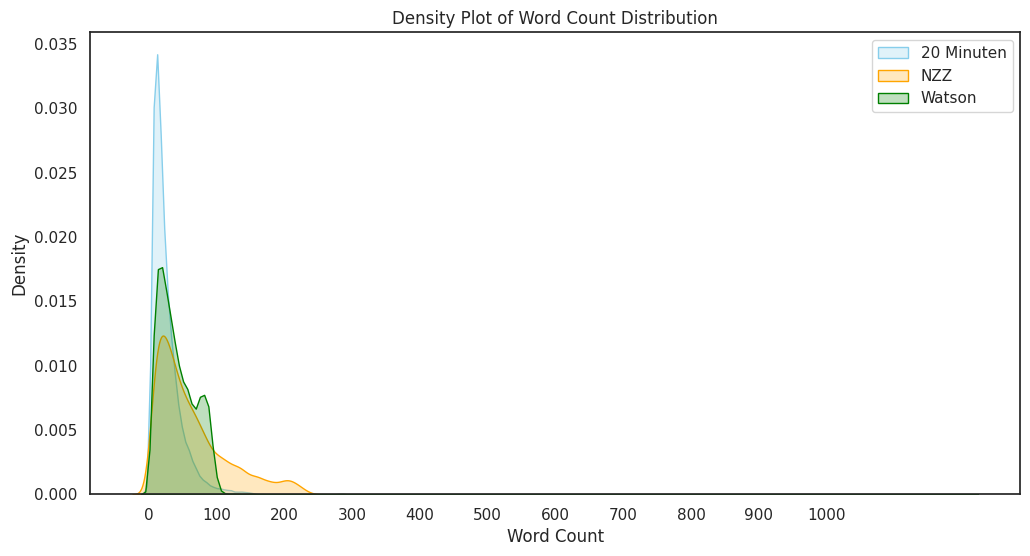

In [ ]:
# Set up the figure and axis
plt.figure(figsize=(12, 6))

sns.set_style("white")
# Plot density for df_20min
sns.kdeplot(df_20min["word_count"], color="skyblue", fill=True, label="20 Minuten")

# Plot density for df_nzz
sns.kdeplot(df_nzz["word_count"], color="orange", fill=True, label="NZZ")

# Plot density for df_watson
sns.kdeplot(df_watson["word_count"], color="green", fill=True, label="Watson")

# Set labels and title
plt.title("Density Plot of Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Density")

# Set x-axis intervals
plt.xticks(range(0, 1001, 100))

# Show legend
plt.legend()

# Show the plot
plt.show()

### Word count - Mode, mean & median
The **mode** represents the most frequently occurring word count, serving as a central measure of the typical comment length within each dataset.

In [ ]:
def calculate_word_count_metrics(df, column):
    """
    Calculate mode, mean, and median values for a specified column in the dataframe.

    Parameters:
    - df: The pandas dataframe containing the data.
    - column: The name of the column for which metrics are calculated.

    Returns:
    - A tuple containing the dataset name, mode, mean, and median values.
    """
    # Calculate mode using NumPy
    mode_value = np.argmax(np.bincount(df[column]))

    # Calculate mean and median values
    mean_value = round(df[column].mean(), 1)
    median_value = round(df[column].median(), 1)

    return df.name, mode_value, mean_value, median_value

# Create a PrettyTable
table = PrettyTable()
table.field_names = ["Dataset", "Mode", "Mean", "Median"]

# Add data to the table
table.add_row(calculate_word_count_metrics(df_20min, "word_count"))
table.add_row(calculate_word_count_metrics(df_watson, "word_count"))
table.add_row(calculate_word_count_metrics(df_nzz, "word_count"))

# Print the table
print(table)

+------------+------+------+--------+
|  Dataset   | Mode | Mean | Median |
+------------+------+------+--------+
| 20 Minuten |  9   | 25.5 |  19.0  |
|   Watson   |  18  | 41.4 |  35.0  |
|    NZZ     |  15  | 62.6 |  47.0  |
+------------+------+------+--------+


### Word count - IQR
The **interquartile range (IQR)** provides insights into the dispersion of comment lengths within each dataset, capturing the range where the middle 50% of the data is concentrated and highlighting the variability in comment lengths.

In [ ]:
def calculate_word_count_iqr(df, column):
    """
    Calculate Q1, Q2 (median), Q3, and IQR values for a specified column in the dataframe.

    Parameters:
    - df: The pandas dataframe containing the data.
    - column: The name of the column for which IQR metrics are calculated.

    Returns:
    - A tuple containing the dataset name, Q1, Q2 (median), Q3, and IQR values.
    """
    # Calculate Q1, Q2 (median), Q3, and IQR values
    q1, q2, q3 = df[column].quantile([0.25, 0.5, 0.75])
    iqr = q3 - q1

    return df.name, q1, q2, q3, iqr

# Create a PrettyTable
table = PrettyTable()
table.field_names = ["Dataset", "Q1", "Q2 (Median)", "Q3", "IQR"]

# Add rows to the table
table.add_row(calculate_word_count_iqr(df_20min, "word_count"))
table.add_row(calculate_word_count_iqr(df_watson, "word_count"))
table.add_row(calculate_word_count_iqr(df_nzz, "word_count"))

# Print the table
print(table)

+------------+------+-------------+------+------+
|  Dataset   |  Q1  | Q2 (Median) |  Q3  | IQR  |
+------------+------+-------------+------+------+
| 20 Minuten | 11.0 |     19.0    | 33.0 | 22.0 |
|   Watson   | 19.0 |     35.0    | 61.0 | 42.0 |
|    NZZ     | 23.0 |     47.0    | 86.0 | 63.0 |
+------------+------+-------------+------+------+


## Sentiment & Emotional Intensity
In this part of data exploration, the focus shifts to examining the sentiment and emotional intensity scores within each dataset. Utilizing boxplots and various statistical metrics, including mode, mean, median, standard deviation, and interquartile range (IQR), offers a comprehensive understanding of the distribution and central tendencies of these crucial variables.

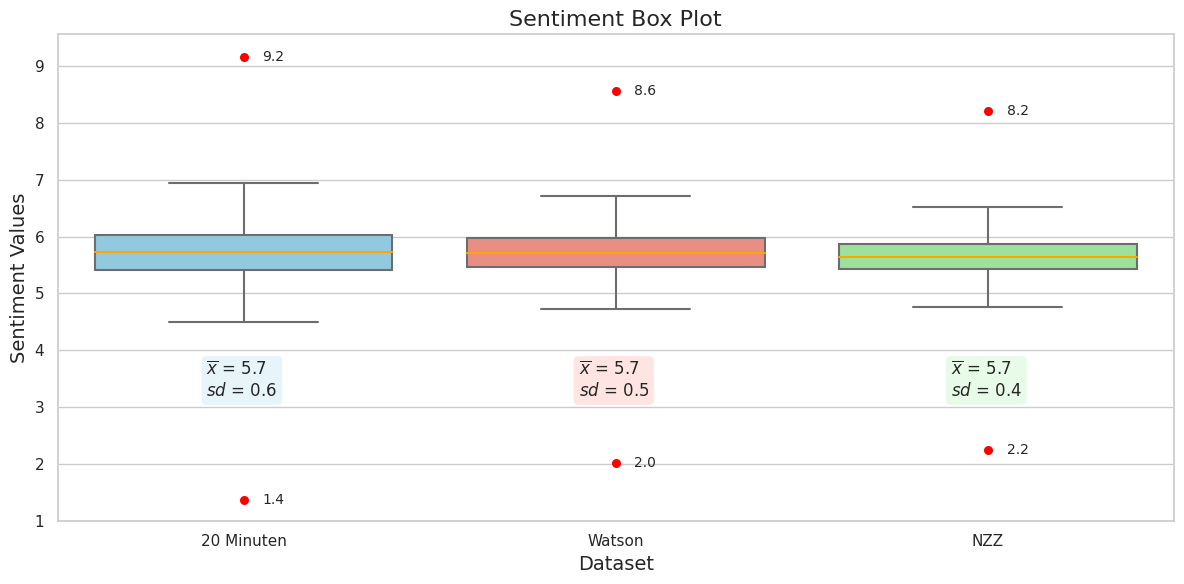

In [ ]:
dfs = [df_20min, df_watson, df_nzz]
names = [df.name for df in dfs]     # Will later be also used in the summary table

# Create a long-format dataframe for 'senti' column
df_long_senti = pd.melt(pd.concat([df["senti"] for df in dfs], axis=1, keys=names), var_name="Source", value_name="Values")

# Set style
sns.set(style="whitegrid")

# Boxplot for 'senti'
plt.figure(figsize=(12, 6))
g_senti = sns.boxplot(x="Source", y="Values", data=df_long_senti, palette=["skyblue", "salmon", "lightgreen"], fliersize=0)

# Set y-axis limit to start from 1
plt.ylim(1, None)

# Titles and labels
plt.title("Sentiment Box Plot", fontsize=16)
plt.xlabel("Dataset", fontsize=14)
plt.ylabel("Sentiment Values", fontsize=14)

# Display mean, standard deviation, maximum, and minimum for 'senti'
for i, df in enumerate(dfs):
    senti_values = df["senti"]
    mean_val, sd_val, max_val, min_val = round(senti_values.mean(), 1), round(senti_values.std(), 1), senti_values.max(), senti_values.min()

    text_str = f"$\overline{{x}}$ = {mean_val}\n$sd$ = {sd_val}"
    props = dict(boxstyle="round", facecolor=["skyblue", "salmon", "lightgreen"][i], alpha=0.2)
    g_senti.text(i - 0.1, 3.2, text_str, fontsize=12, bbox=props)  # Adjust the y-coordinate

    # Display max and min as points
    plt.scatter([i], [max_val], color="red", marker="o", s=30, zorder=10)
    plt.scatter([i], [min_val], color="red", marker="o", s=30, zorder=10)

    # Display values next to points
    plt.text(i + 0.05, max_val, f"{round(max_val, 1)}", fontsize=10, va="center")
    plt.text(i + 0.05, min_val, f"{round(min_val, 1)}", fontsize=10, va="center")

    # Find median line and set color to orange
    median_line = g_senti.findobj(matplotlib.lines.Line2D)[i * 6 + 4]
    median_line.set_color("orange")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
def generate_summary_table(dataframes, column_name, names):
    """
    Generate a summary table for specified column statistics across multiple datasets.

    Parameters:
    - dataframes (list): List of pandas dataframe to analyze.
    - column_name (str): Name of the column to generate statistics for.
    - names (list): List of names corresponding to each dataframe.

    Returns:
    None (prints the summary table).
    """
    # Create an empty table
    table = PrettyTable()

    # Add columns to the table
    table.field_names = ["Dataset", "Mean", "Std Dev", "Min", "25%", "Median", "75%", "Max", "IQR"]

    # Iterate over the dataframes
    for df, name in zip(dataframes, names):
        # Extract relevant statistics
        stats = df[column_name].describe(percentiles=[.25, .5, .75])

        # Add a row to the table
        table.add_row([name] + [round(stats[attr], 2) for attr in ["mean", "std", "min", "25%", "50%", "75%", "max"]] +
                      [round(stats["75%"] - stats["25%"], 2)])

    # Print the table
    print(table)

In [ ]:
# Generate the summary table for sentiment values, using the set up function
generate_summary_table(dfs, "senti", names)

+------------+------+---------+------+------+--------+------+------+------+
|  Dataset   | Mean | Std Dev | Min  | 25%  | Median | 75%  | Max  | IQR  |
+------------+------+---------+------+------+--------+------+------+------+
| 20 Minuten | 5.73 |   0.58  | 1.37 | 5.42 |  5.73  | 6.03 | 9.16 | 0.61 |
|   Watson   | 5.72 |   0.46  | 2.02 | 5.47 |  5.72  | 5.97 | 8.55 | 0.5  |
|    NZZ     | 5.65 |   0.43  | 2.25 | 5.43 |  5.64  | 5.86 | 8.2  | 0.44 |
+------------+------+---------+------+------+--------+------+------+------+


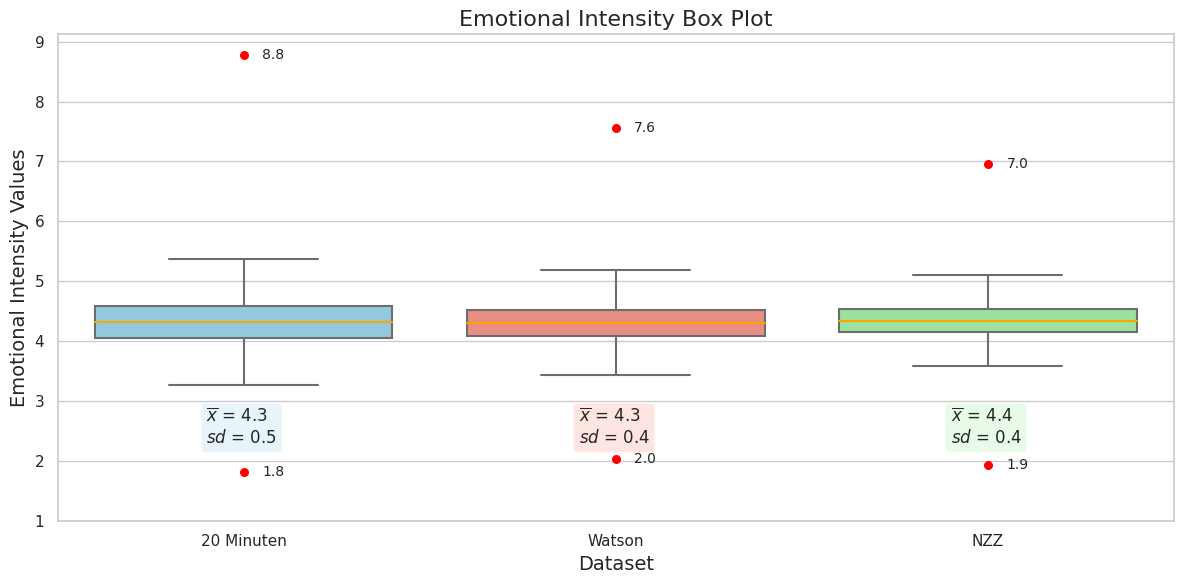

In [ ]:
# Set up a boxplot for the emotional intensity values
dfs = [df_20min, df_watson, df_nzz]
names = [df.name for df in dfs]

# Create a long-format dataframe for 'emoInten' column
df_long_emoInten = pd.melt(pd.concat([df["emoInten"] for df in dfs], axis=1, keys=names), var_name="Source", value_name="Values")

# Set style
sns.set(style="whitegrid")

# Boxplot for 'emoInten'
plt.figure(figsize=(12, 6))
g_emoInten = sns.boxplot(x="Source", y="Values", data=df_long_emoInten, palette=["skyblue", "salmon", "lightgreen"], fliersize=0)

# Set y-axis limit to start from 1
plt.ylim(1, None)

# Titles and labels
plt.title("Emotional Intensity Box Plot", fontsize=16)
plt.xlabel("Dataset", fontsize=14)
plt.ylabel("Emotional Intensity Values", fontsize=14)

# Display mean, standard deviation, maximum, and minimum for 'emoInten'
for i, df in enumerate(dfs):
    emoInten_values = df["emoInten"]
    mean_val, sd_val, max_val, min_val = round(emoInten_values.mean(), 1), round(emoInten_values.std(), 1), emoInten_values.max(), emoInten_values.min()

    text_str = f"$\overline{{x}}$ = {mean_val}\n$sd$ = {sd_val}"
    props = dict(boxstyle="round", facecolor=["skyblue", "salmon", "lightgreen"][i], alpha=0.2)
    g_emoInten.text(i - 0.1, 2.3, text_str, fontsize=12, bbox=props)  # Adjust the y-coordinate

    # Display max and min as points
    plt.scatter([i], [max_val], color="red", marker="o", s=30, zorder=10)
    plt.scatter([i], [min_val], color="red", marker="o", s=30, zorder=10)

    # Display values next to points
    plt.text(i + 0.05, max_val, f'{round(max_val, 1)}', fontsize=10, va="center")
    plt.text(i + 0.05, min_val, f'{round(min_val, 1)}', fontsize=10, va="center")

    # Find median line and set color to orange
    median_line = g_emoInten.findobj(matplotlib.lines.Line2D)[i * 6 + 4]
    median_line.set_color("orange")

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Generate summary table for emotional intensity values
generate_summary_table(dfs, "emoInten", names)

+------------+------+---------+------+------+--------+------+------+------+
|  Dataset   | Mean | Std Dev | Min  | 25%  | Median | 75%  | Max  | IQR  |
+------------+------+---------+------+------+--------+------+------+------+
| 20 Minuten | 4.34 |   0.47  | 1.83 | 4.06 |  4.32  | 4.59 | 8.77 | 0.53 |
|   Watson   | 4.33 |   0.39  | 2.04 | 4.1  |  4.31  | 4.53 | 7.56 | 0.43 |
|    NZZ     | 4.36 |   0.36  | 1.94 | 4.16 |  4.34  | 4.53 | 6.95 | 0.38 |
+------------+------+---------+------+------+--------+------+------+------+


## Polarisation Classification
The final part of the Exploratory Data Analysis (EDA) focuses on polarisation classification. In the project conducted by Griesser et al. (2023), a polarisation classification was performed based on sentiment and emotional intensity scores. Each comment was assigned one of seven polarisation labels. The determination of these labels was based on the median and the median absolute deviation (MAD). However, since the dataset used did not include this classification, the polarisation labels were replicated in the first step using the logic described in the paper by Griesser et al. (2023).

Accordingly, the following values were used:<br>
Sentiment median: 5.804 <br>
Sentiment MAD: 0.388

Emotional intensity median: 4.143<br>
Emotional intensity MAD: 0.273<br><br>

<font color='red'>NOTE: The inspection conducted in a previous step revealed that the datasets contain NaN values for both the sentiment variable and emotional intensity. In such cases, no polarisation label can be assigned and NaN is used as the polarisation label for these cases. It is important to note that these cases are excluded from the subsequent analysis. For example, when referring to the percentage of the "Neutral Polarisation" class, this represents the relative proportion without including the NaN cases in the total number of cases.</font>

In [ ]:
# Define the median and MAD values for sentiment and emotional intensity
# Those values are based on the provided information in Griesser et al. (2023)
median_sentiment = 5.804
mad_sentiment = 0.388
median_emotional_intensity = 4.143
mad_emotional_intensity = 0.273

# Function to classify polarisation based on sentiment and emotional intensity
def classify_polarisation(row):
    """
    Classify polarisation based on sentiment and emotional intensity scores.

    Parameters:
    - row (pd.Series): A Pandas Series representing a row of the dataframe with 'senti' and 'emoInten' columns.

    Returns:
    - str: Classification label indicating the polarisation level.

    Note: NaN values in sentiment or emotional intensity result in NaN classification.
    """
    sentiment_score = row["senti"]
    emotion_intensity_score = row["emoInten"]

    # Check for NaN values in sentiment or emotional intensity
    if np.isnan(sentiment_score) or np.isnan(emotion_intensity_score):
        return np.nan

    sentiment_value = (sentiment_score - median_sentiment) / mad_sentiment
    emotion_intensity_value = (emotion_intensity_score - median_emotional_intensity) / mad_emotional_intensity

    # Initialize with a default classification
    classification = "Neutral polarisation"

    # Check conditions separately for each classification
    if sentiment_value >= 3 and emotion_intensity_value >= 3:
        classification = "Extreme positive polarisation"
    elif sentiment_value >= 2 and emotion_intensity_value >= 2:
        classification = "Strong positive polarisation"
    elif sentiment_value >= 1 and emotion_intensity_value >= 1:
        classification = "Positive polarisation"
    elif sentiment_value <= -3 and emotion_intensity_value >= 3:
        classification = "Extreme negative polarisation"
    elif sentiment_value <= -2 and emotion_intensity_value >= 2:
        classification = "Strong negative polarisation"
    elif sentiment_value <= -1 and emotion_intensity_value >= 1:
        classification = "Negative polarisation"

    return classification

# Apply the classification function to set the polarisation label
df_20min["polarisation"] = df_20min.apply(classify_polarisation, axis=1)
df_watson["polarisation"] = df_watson.apply(classify_polarisation, axis=1)
df_nzz["polarisation"] = df_nzz.apply(classify_polarisation, axis=1)

In [ ]:
def calculate_label_statistics(df, column_name):
    """
    Calculate statistics for a categorical label column in a dataframe.

    Parameters:
    - df (pd.DataFrame): The Pandas dataframe containing the categorical label column.
    - column_name (str): The name of the column containing categorical labels.

    Returns:
    - tuple: A tuple containing:
        - label_counts (pd.Series): Counts of each label in the column.
        - label_percentages (pd.Series): Percentages of each label in the column.
        - nan_count (int): Number of NaN values in the column.
    """
    # Calculate label counts
    label_counts = df[column_name].value_counts()

    # Calculate label percentages
    label_percentages = (label_counts / len(df[column_name].dropna())) * 100

    # Calculate the number of NaN values
    nan_count = df[column_name].isna().sum()

    return label_counts, label_percentages, nan_count

In [ ]:
# Calculate statistics for the polarisation column in each dataset
label_counts_20min, label_percentages_20min, nan_count_20min = calculate_label_statistics(df_20min, "polarisation")
label_counts_watson, label_percentages_watson, nan_count_watson = calculate_label_statistics(df_watson, "polarisation")
label_counts_nzz, label_percentages_nzz, nan_count_nzz = calculate_label_statistics(df_nzz, "polarisation")

In [ ]:
# Define the columns
columns = ["Class Label", "20 Minuten", "Watson", "NZZ"]

# Create a PrettyTable for the combined dataset
table_polarisation = PrettyTable(columns)

# Add data to the table
for label, p_20min, p_watson, p_nzz in zip(label_counts_20min.index, label_percentages_20min.values, label_percentages_watson.values, label_percentages_nzz.values):
    table_polarisation.add_row([label, f"{p_20min:.2f}%", f"{p_watson:.2f}%", f"{p_nzz:.2f}%"])

# Print the combined table
print("Percentage distribution of polarisation classes in the three datasets:")
print(table_polarisation)

Percentage distribution of polarisation classes in the three datasets:
+-------------------------------+------------+--------+--------+
|          Class Label          | 20 Minuten | Watson |  NZZ   |
+-------------------------------+------------+--------+--------+
|      Neutral polarisation     |   81.33%   | 84.82% | 83.09% |
|     Negative polarisation     |   11.25%   | 10.56% | 12.73% |
|  Strong negative polarisation |   3.10%    | 2.07%  | 2.07%  |
|     Positive polarisation     |   2.52%    | 1.64%  | 1.23%  |
| Extreme negative polarisation |   1.25%    | 0.72%  | 0.69%  |
|  Strong positive polarisation |   0.36%    | 0.15%  | 0.15%  |
| Extreme positive polarisation |   0.19%    | 0.04%  | 0.03%  |
+-------------------------------+------------+--------+--------+


In [ ]:
print(f"Number of NaN values in 'polarisation' column for 20min dataset: {nan_count_20min}")
print(f"Number of NaN values in 'polarisation' column for Watson dataset: {nan_count_watson}")
print(f"Number of NaN values in 'polarisation' column for NZZ dataset: {nan_count_nzz}")

Number of NaN values in 'polarisation' column for 20min dataset: 415
Number of NaN values in 'polarisation' column for Watson dataset: 128
Number of NaN values in 'polarisation' column for NZZ dataset: 58


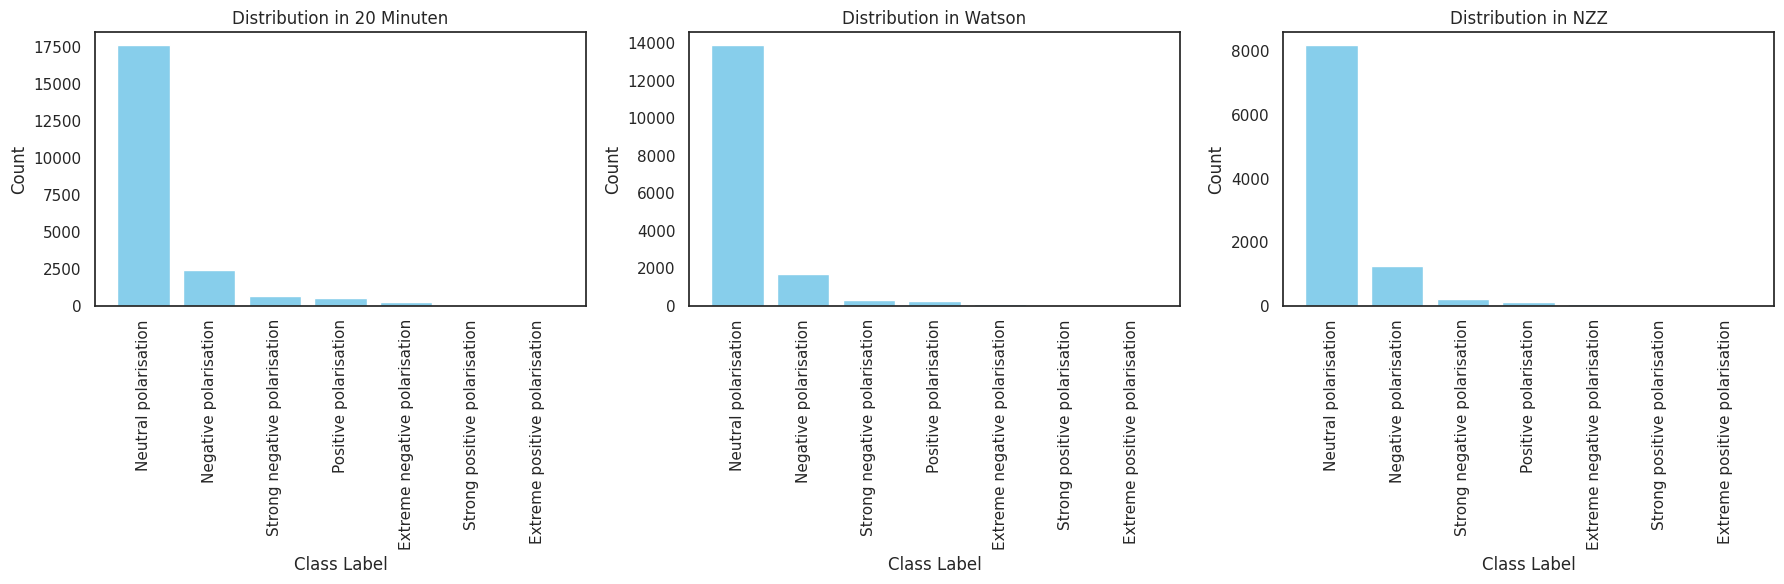

In [ ]:
datasets = [df_20min, df_watson, df_nzz]
dataset_names = [df.name for df in datasets]

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Iterate through the datasets and plot the class distribution
for i, (df, dataset_name) in enumerate(zip(datasets, dataset_names)):
    label_counts = df["polarisation"].value_counts()
    axes[i].bar(label_counts.index, label_counts.values, color="skyblue")
    axes[i].set_xlabel("Class Label")
    axes[i].set_ylabel("Count")
    axes[i].set_title(f"Distribution in {dataset_name}")
    axes[i].tick_params(axis="x", rotation=90)
    axes[i].grid(False)  # Turn off grid lines

plt.tight_layout()
plt.show()

In [ ]:
# Define the general path where to save the CSV files
base_path = "/content/drive/MyDrive/output_final/NB01_EDA/"

# Save the dataframes to CSV files with the specified file paths
df_nzz.to_csv(base_path + "nzz_classified.csv", index=False)
df_20min.to_csv(base_path + "20min_classified.csv", index=False)
df_watson.to_csv(base_path + "watson_classified.csv", index=False)

## Appendix

### ydata-profiling
**ydata-profiling** is a versatile library for in-depth exploratory data analysis. This tool simplifies the understanding of complex datasets, offering comprehensive reports with insightful visualizations. Ideal for data preprocessing, it facilitates the identification of patterns and potential issues. The reports can be exported in HTML format, promoting collaboration and documentation in the analysis process.

In [ ]:
from ydata_profiling import ProfileReport

profile_20min = ProfileReport(df_20min, title="20 Minuten Dataset Report")
profile_watson = ProfileReport(df_watson, title="Watson Dataset Report")
profile_nzz = ProfileReport(df_nzz, title="NZZ Dataset Report")

# To save the report to an HTML file
profile_20min.to_file("20min_report.html")
profile_watson.to_file("watson_report.html")
profile_nzz.to_file("nzz_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Word count - textClean values

In [ ]:
# Apply the function to each dataframe
calculate_word_count(df_20min, text_column="textClean", new_column="word_count_clean")
calculate_word_count(df_watson, text_column="textClean", new_column="word_count_clean")
calculate_word_count(df_nzz, text_column="textClean", new_column="word_count_clean")

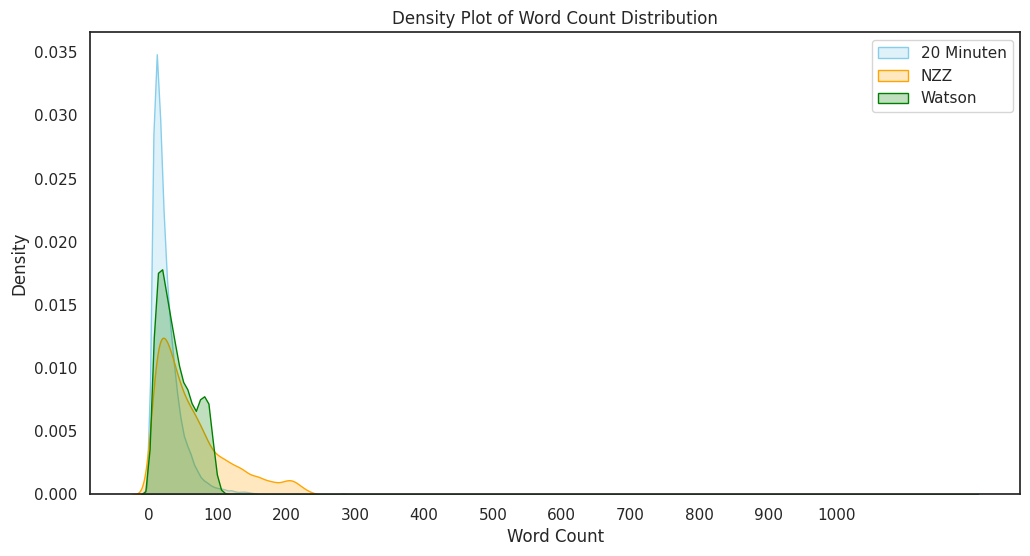

In [ ]:
# Set up the figure and axis
plt.figure(figsize=(12, 6))

sns.set_style("white")
# Plot density for df_20min
sns.kdeplot(df_20min["word_count_clean"], color="skyblue", fill=True, label="20 Minuten")

# Plot density for df_nzz
sns.kdeplot(df_nzz["word_count_clean"], color="orange", fill=True, label="NZZ")

# Plot density for df_watson
sns.kdeplot(df_watson["word_count_clean"], color="green", fill=True, label="Watson")

# Set labels and title
plt.title("Density Plot of Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Density")

# Set x-axis intervals
plt.xticks(range(0, 1001, 100))

# Show legend
plt.legend()

# Show the plot
plt.show()

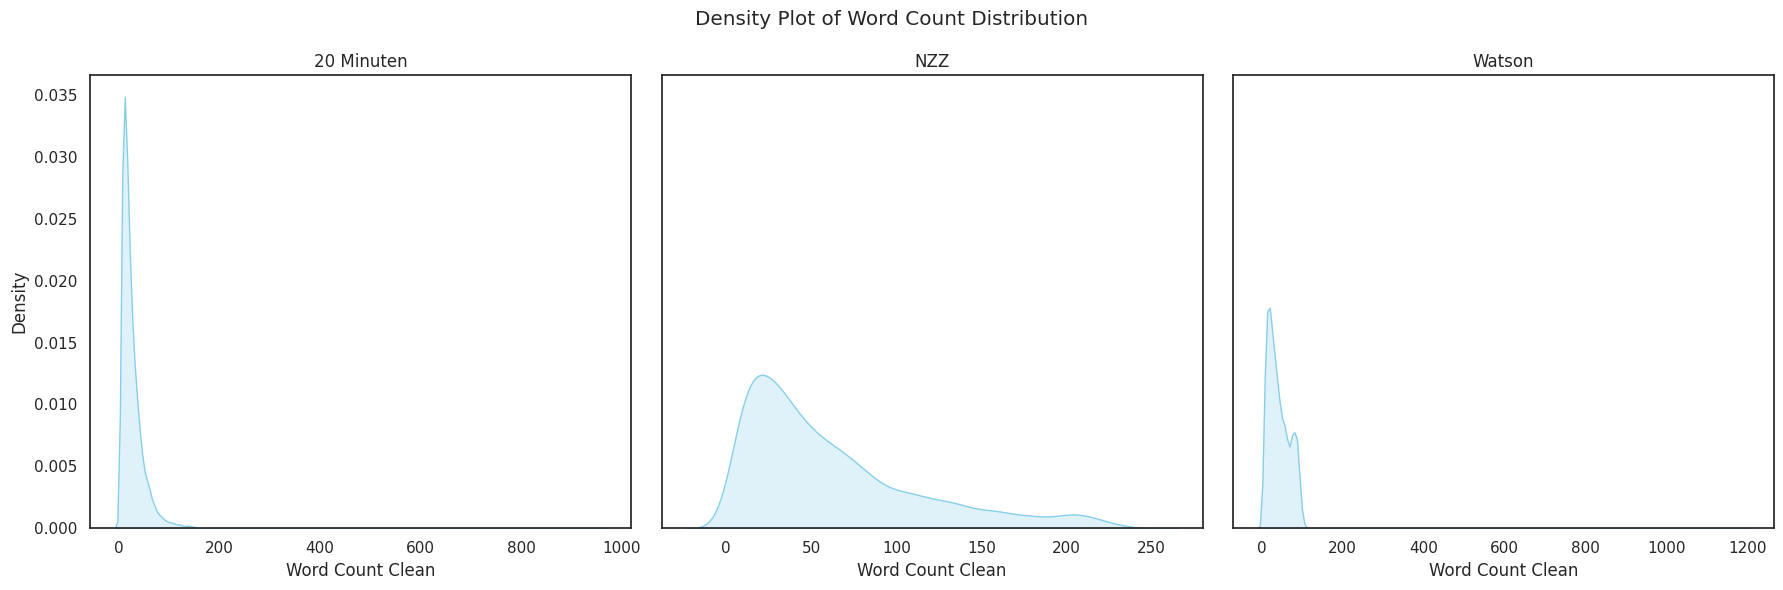

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)

# Plot density for df_20min
sns.kdeplot(df_20min["word_count_clean"], color="skyblue", fill=True, ax=axes[0])
axes[0].set_title("20 Minuten")

# Plot density for df_nzz
sns.kdeplot(df_nzz["word_count_clean"], color="skyblue", fill=True, ax=axes[1])
axes[1].set_title('NZZ')

# Plot density for df_watson
sns.kdeplot(df_watson["word_count_clean"], color="skyblue", fill=True, ax=axes[2])
axes[2].set_title("Watson")

# Set common labels
for ax in axes:
    ax.set_xlabel("Word Count Clean")
    ax.set_ylabel("Density")

plt.suptitle("Density Plot of Word Count Distribution")
plt.tight_layout()
plt.show()

### Word count - Mode

In [ ]:
# Get the mode value from each dataframe
mode_value_nzz = np.argmax(np.bincount(df_nzz["word_count_clean"]))
mode_value_20min = np.argmax(np.bincount(df_20min["word_count_clean"]))
mode_value_watson = np.argmax(np.bincount(df_watson["word_count_clean"]))

print(f'The mode in the 20 minutes data set is:  {mode_value_20min}\n'
      f'The mode in the Watson data set is:     {mode_value_watson}\n'
      f'The mode in the NZZ data set is:        {mode_value_nzz}')

The mode in the 20 minutes data set is:  9
The mode in the Watson data set is:     18
The mode in the NZZ data set is:        15


### Word count - Mean and Median

In [ ]:
# Calculate mean and median values for each dataframe
mean_values = [df_20min["word_count_clean"].mean(), df_nzz["word_count_clean"].mean(), df_watson["word_count_clean"].mean()]
median_values = [df_20min["word_count_clean"].median(), df_nzz["word_count_clean"].median(), df_watson["word_count_clean"].median()]
mode_values = [mode_value_20min, mode_value_nzz, mode_value_watson]

# Create a PrettyTable
table = PrettyTable()
table.field_names = ["Dataset", "Mode", "Mean", "Median"]

# Add data to the table
table.add_row(["20 Minuten", round(mode_values[0], 1), round(mean_values[0], 1), median_values[0]])
table.add_row(["NZZ", round(mode_values[1], 1), round(mean_values[1], 1), median_values[1]])
table.add_row(["Watson", round(mode_values[2], 1), round(mean_values[2], 1), median_values[2]])

# Print the table
print(table)

+------------+------+------+--------+
|  Dataset   | Mode | Mean | Median |
+------------+------+------+--------+
| 20 Minuten |  9   | 25.3 |  19.0  |
|    NZZ     |  15  | 62.3 |  46.0  |
|   Watson   |  18  | 41.0 |  35.0  |
+------------+------+------+--------+


### Word count - IQR

In [ ]:
# Calculate Q1, Q3, and IQR values
# 20 Minuten dataset
q1_20min, q2_20min, q3_20min = df_20min["word_count_clean"].quantile([0.25, 0.5, 0.75])
iqr_20min = q3_20min - q1_20min

# NZZ dataset
q1_nzz, q2_nzz, q3_nzz = df_nzz["word_count_clean"].quantile([0.25, 0.5, 0.75])
iqr_nzz = q3_nzz - q1_nzz

# Watson dataset
q1_watson, q2_watson, q3_watson = df_watson["word_count_clean"].quantile([0.25, 0.5, 0.75])
iqr_watson = q3_watson - q1_watson

# Create a PrettyTable
table = PrettyTable()
table.field_names = ["Dataset", "Q1", "Q2", "Q3", "IQR"]
table.add_row(["20 Minuten", q1_20min, q2_20min, q3_20min, iqr_20min])
table.add_row(["NZZ", q1_nzz, q2_nzz, q3_nzz, iqr_nzz])
table.add_row(["Watson", q1_watson, q2_watson, q3_watson, iqr_watson])

# Print the table
print(table)

+------------+------+------+------+------+
|  Dataset   |  Q1  |  Q2  |  Q3  | IQR  |
+------------+------+------+------+------+
| 20 Minuten | 11.0 | 19.0 | 32.0 | 21.0 |
|    NZZ     | 23.0 | 46.0 | 85.0 | 62.0 |
|   Watson   | 19.0 | 35.0 | 61.0 | 42.0 |
+------------+------+------+------+------+


### Polarisation Classification - Count & Percentage

In [ ]:
from prettytable import PrettyTable

# Define the columns
columns = ["Class Label", "Count", "Percentage"]

# Create a PrettyTable for each dataset
table_20min = PrettyTable(columns)
table_watson = PrettyTable(columns)
table_nzz = PrettyTable(columns)

# Add data to the tables
for label, count, percentage in zip(label_counts_20min.index, label_counts_20min.values, label_percentages_20min.values):
    table_20min.add_row([label, count, f"{percentage:.2f}%"])

for label, count, percentage in zip(label_counts_watson.index, label_counts_watson.values, label_percentages_watson.values):
    table_watson.add_row([label, count, f"{percentage:.2f}%"])

for label, count, percentage in zip(label_counts_nzz.index, label_counts_nzz.values, label_percentages_nzz.values):
    table_nzz.add_row([label, count, f"{percentage:.2f}%"])

# Print the tables
print("20min data:")
print(table_20min)

print("\nWatson data:")
print(table_watson)

print("\nNZZ data:")
print(table_nzz)

20min data:
+-------------------------------+-------+------------+
|          Class Label          | Count | Percentage |
+-------------------------------+-------+------------+
|      Neutral polarisation     | 17634 |   81.33%   |
|     Negative polarisation     |  2440 |   11.25%   |
|  Strong negative polarisation |  672  |   3.10%    |
|     Positive polarisation     |  546  |   2.52%    |
| Extreme negative polarisation |  270  |   1.25%    |
|  Strong positive polarisation |   78  |   0.36%    |
| Extreme positive polarisation |   41  |   0.19%    |
+-------------------------------+-------+------------+

Watson data:
+-------------------------------+-------+------------+
|          Class Label          | Count | Percentage |
+-------------------------------+-------+------------+
|      Neutral polarisation     | 13873 |   84.82%   |
|     Negative polarisation     |  1727 |   10.56%   |
|  Strong negative polarisation |  338  |   2.07%    |
|     Positive polarisation     |  269 